### Import libraries

In [1]:
import os
import yaml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import probplot, norm
from feature_engine import transformation as vt
from sklearn.preprocessing import OneHotEncoder, StandardScaler

### Import data

In [2]:
with open(r'config.yml') as file:
    val = yaml.load(file, Loader=yaml.FullLoader)

In [3]:
data = pd.read_csv('BankChurners.csv')
data = data.drop(val["remove_variables"], axis=1)

### Yeo Johnson Transformation

I have decided to use the Yeo Johnson transformation. One of the reasons is that two of these variables contain 0, and with that limitation we cannot use the Log and Box Cox Transformation.

In [4]:
tf_YJ = vt.YeoJohnsonTransformer(variables=[
                                    "Credit_Limit", "Total_Revolving_Bal", 
                                    "Avg_Open_To_Buy", "Avg_Utilization_Ratio"])
data_transformed = tf_YJ.fit_transform(data)

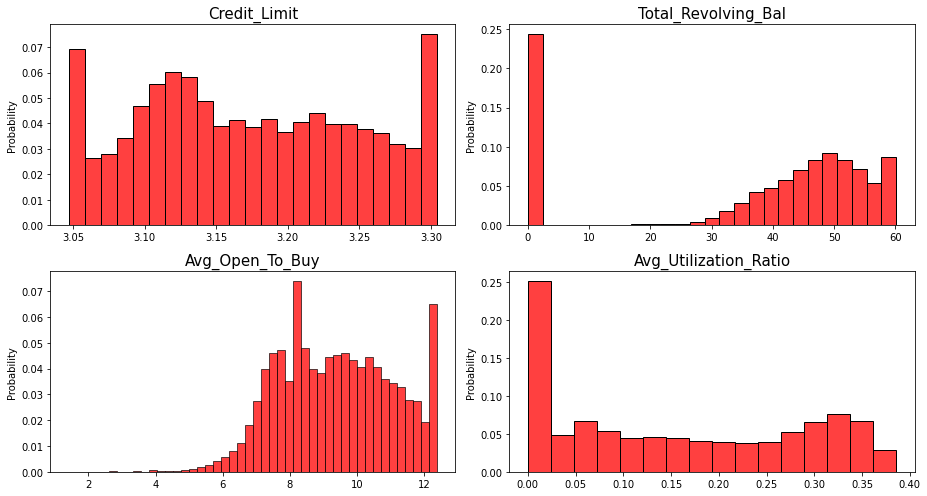

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(13, 7), tight_layout=True)
axes_flatten = axes.flatten()

sns.histplot(data_transformed["Credit_Limit"], color='red', stat='probability', ax=axes_flatten[0])
sns.histplot(data_transformed["Total_Revolving_Bal"], color='red', stat='probability', ax=axes_flatten[1])
sns.histplot(data_transformed["Avg_Open_To_Buy"], color='red', stat='probability', ax=axes_flatten[2])
sns.histplot(data_transformed["Avg_Utilization_Ratio"], color='red', stat='probability', ax=axes_flatten[3])

axes_flatten[0].set_title("Credit_Limit", size=15)
axes_flatten[1].set_title("Total_Revolving_Bal", size=15)
axes_flatten[2].set_title("Avg_Open_To_Buy", size=15)
axes_flatten[3].set_title("Avg_Utilization_Ratio", size=15)

axes_flatten[0].set_xlabel(None)
axes_flatten[1].set_xlabel(None)
axes_flatten[2].set_xlabel(None)
axes_flatten[3].set_xlabel(None);

### Mapping Categorical Variables

#### Mapping Education Level

In [6]:
mapping_EL = {
    'Unknown':0,
    'Uneducated':1,
    'High School':2,
    'College':3,
    'Graduate':4, 
    'Post-Graduate':5,
    'Doctorate':6
}

data["Education_Level"] = data["Education_Level"].map(mapping_EL)

#### Mapping Income Category

In [7]:
mapping_IC = {
    'Unknown':0,
    'Less than $40K': 1,
    '$40K - $60K': 2,
    '$60K - $80K': 3,
    '$80K - $120K': 4,
    '$120K +': 5
}

data["Income_Category"] = data["Income_Category"].map(mapping_IC)

#### Mapping Card Category

In [8]:
mapping_CC = {
    'Blue': 0,
    'Silver': 1,
    'Gold': 1,
    'Platinum': 1
}

data["Card_Category"] = data["Card_Category"].map(mapping_CC)

#### Mapping Gender

In [9]:
mapping_G = {
    'M':0,
    'F':1
}

data["Gender"] = data["Gender"].map(mapping_G)

#### Mapping Attrition Flag

In [10]:
mapping_AF = {
    'Existing Customer': 0,
    'Attrited Customer': 1
}

data["Attrition_Flag"] = data["Attrition_Flag"].map(mapping_AF)

### Dummy Variables

In [11]:
enc = OneHotEncoder(drop='first')
marital_onehot = enc.fit_transform(data[["Marital_Status"]]).toarray()
data[enc.categories_[0][1:]] = marital_onehot
data.drop("Marital_Status", axis=1, inplace=True)

### Scaling Variables

In [12]:
columns = data.drop("Attrition_Flag", axis=1).columns
scaling = StandardScaler()
data[columns] = scaling.fit_transform(data.drop("Attrition_Flag", axis=1))

In [13]:
data.to_csv("BankChurners_Trans.csv", index=False)